In [266]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from os import path
from fantasyfootball.config import DATA_DIR, pfr_to_fantpros, nfl_color_map, nfl_logo_espn_path_map
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from fantasyfootball.pfrweeklyanalysis import pfr_transform_df, make_target_share_barh_viz, make_rb_tgt_share_viz
from fantasyfootball.tiersweekly import work_list, sean_list, justin_list, different_spelling

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
file_path = r'..\data\weekly-analysis\2020'
week1_raw = pd.read_csv(path.join(file_path,'2020_week_1.csv'))
week2_raw = pd.read_csv(path.join(file_path,'2020_week_2.csv'))
week3_raw = pd.read_csv(path.join(file_path,'2020_week_3.csv'))

In [6]:
week3_raw = pfr_transform_df(week3_raw)

In [7]:
pos = 'RB'
df = week3_raw.loc[(week3_raw['pos'] == pos) & (week3_raw['tgt_share'] > 0) & (week3_raw['rushing_share'] > 0)]

In [8]:
df.head()

,rk,player_name,pos,age,date,lg,tm,home/away,opp,result,g#,week,day,att_ind,rushing_yds,rushing_y/a,rushing_td,tgt_ind,receiving_rec,receiving_yds,receiving_y/r,receiving_td,receiving_y/tgt,att_tm,tgt_tm,rushing_share,tgt_share
0,1,Dalvin Cook,RB,25.048,2020-09-27,NFL,MIN,Home,TEN,L 30-31,3,3,Sun,22.0,181.0,8.23,1.0,5.0,2.0,18.0,9.0,0.0,3.60,30.0,25.0,0.733333,0.200000
1,2,Derrick Henry,RB,26.267,2020-09-27,NFL,TEN,Away,MIN,W 31-30,3,3,Sun,26.0,119.0,4.58,2.0,3.0,2.0,11.0,5.5,0.0,3.67,29.0,33.0,0.896552,0.090909
2,3,Sony Michel,RB,25.223,2020-09-27,NFL,NE,Home,LVR,W 36-20,3,3,Sun,9.0,117.0,13.00,0.0,2.0,2.0,23.0,11.5,0.0,11.50,26.0,28.0,0.346154,0.071429
3,4,Darrell Henderson,RB,23.039,2020-09-27,NFL,LAR,Away,BUF,L 32-35,3,3,Sun,20.0,114.0,5.70,1.0,3.0,1.0,6.0,6.0,0.0,2.00,27.0,31.0,0.740741,0.096774
4,5,James Conner,RB,25.145,2020-09-27,NFL,PIT,Home,HOU,W 28-21,3,3,Sun,18.0,109.0,6.06,1.0,5.0,4.0,40.0,10.0,0.0,8.00,32.0,35.0,0.562500,0.142857


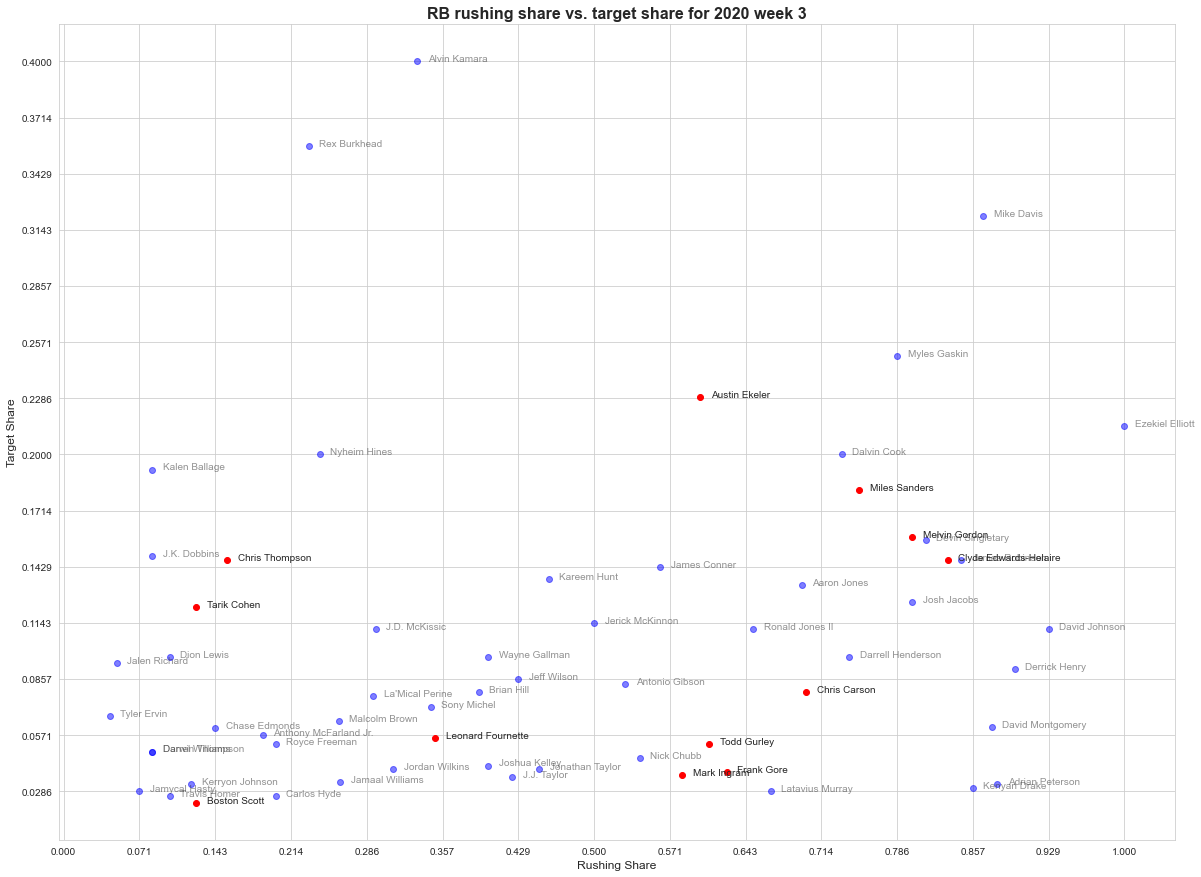

In [267]:
# import flex players fom fantasy teams
player_list = work_list + sean_list + justin_list + different_spelling

df = pfr_transform_df(week3_raw).pipe(pfr_transform_df)

make_rb_tgt_share_viz(df, save=False, player_list=player_list)

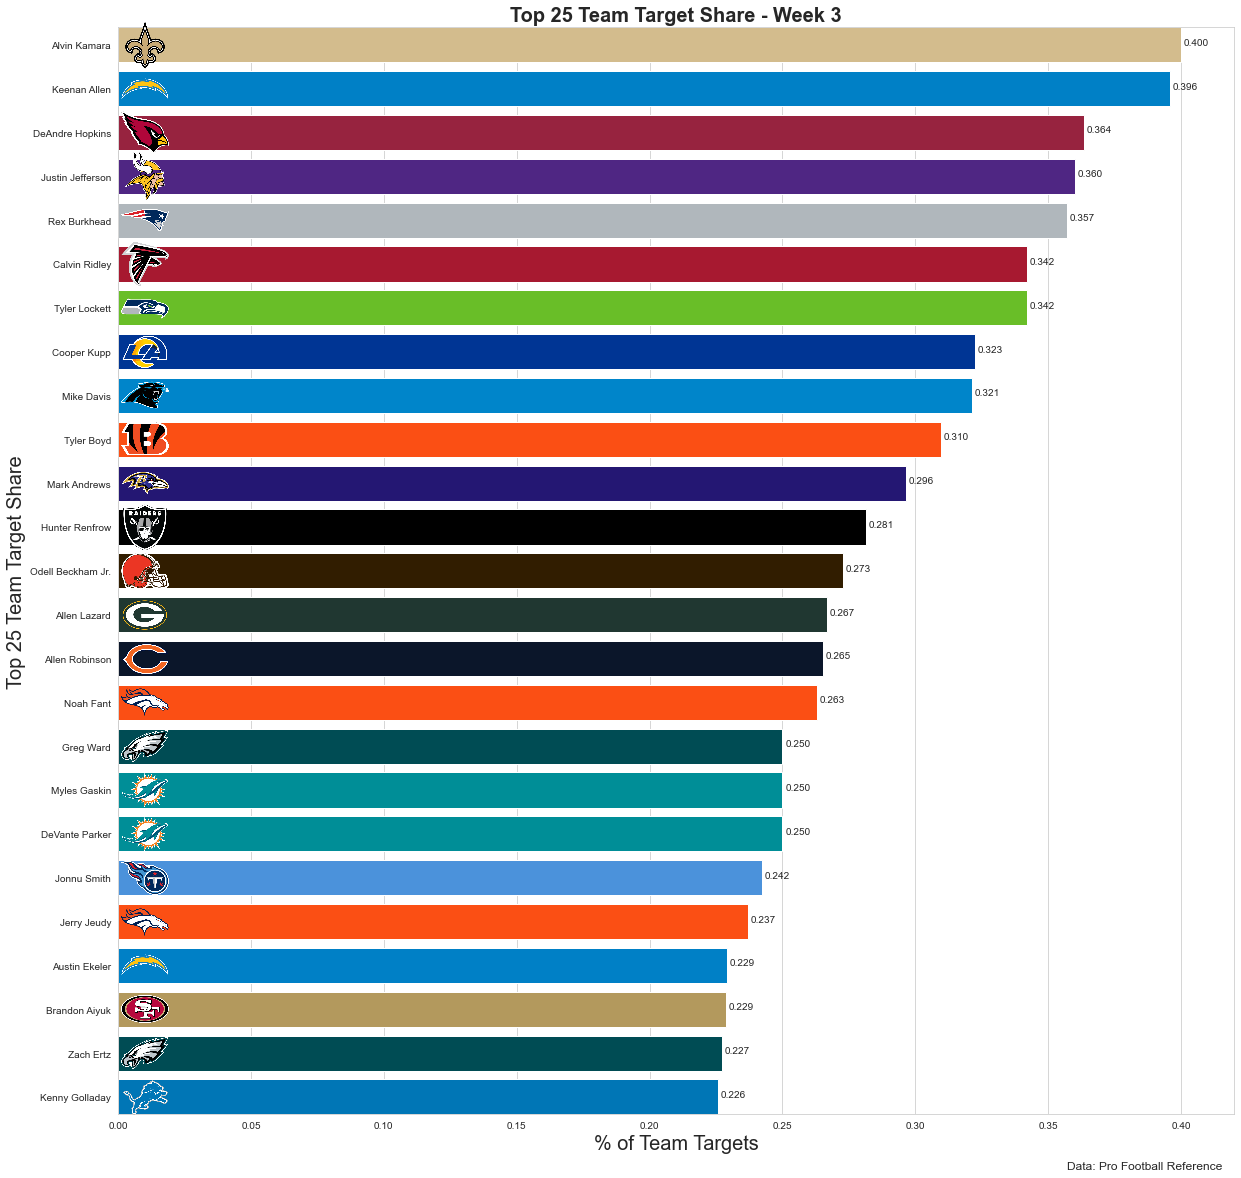

In [268]:
# horizontal bar of the top 25 target share through week 3 in NFL
make_target_share_barh_viz(df)

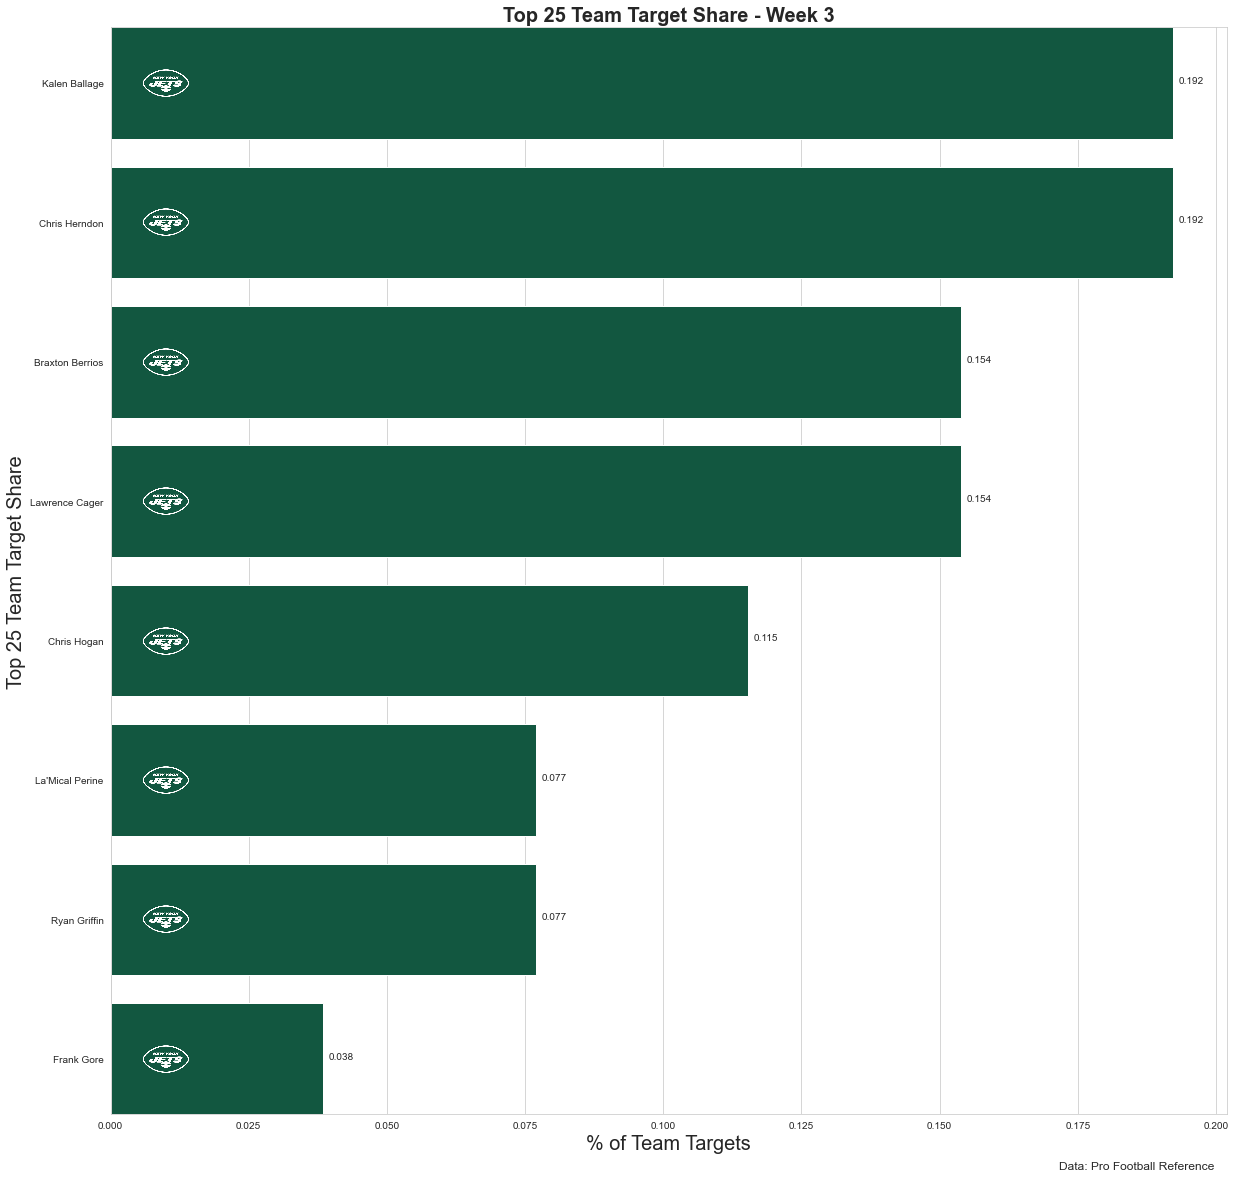

In [269]:
# horizontal bar of the top 25 target share through week 2 by team

team_mask = df['tm'] == 'NYJ'
tgt_share_mask = df['tgt_share'] > 0
team_df = df.loc[team_mask & tgt_share_mask]

make_target_share_barh_viz(team_df)

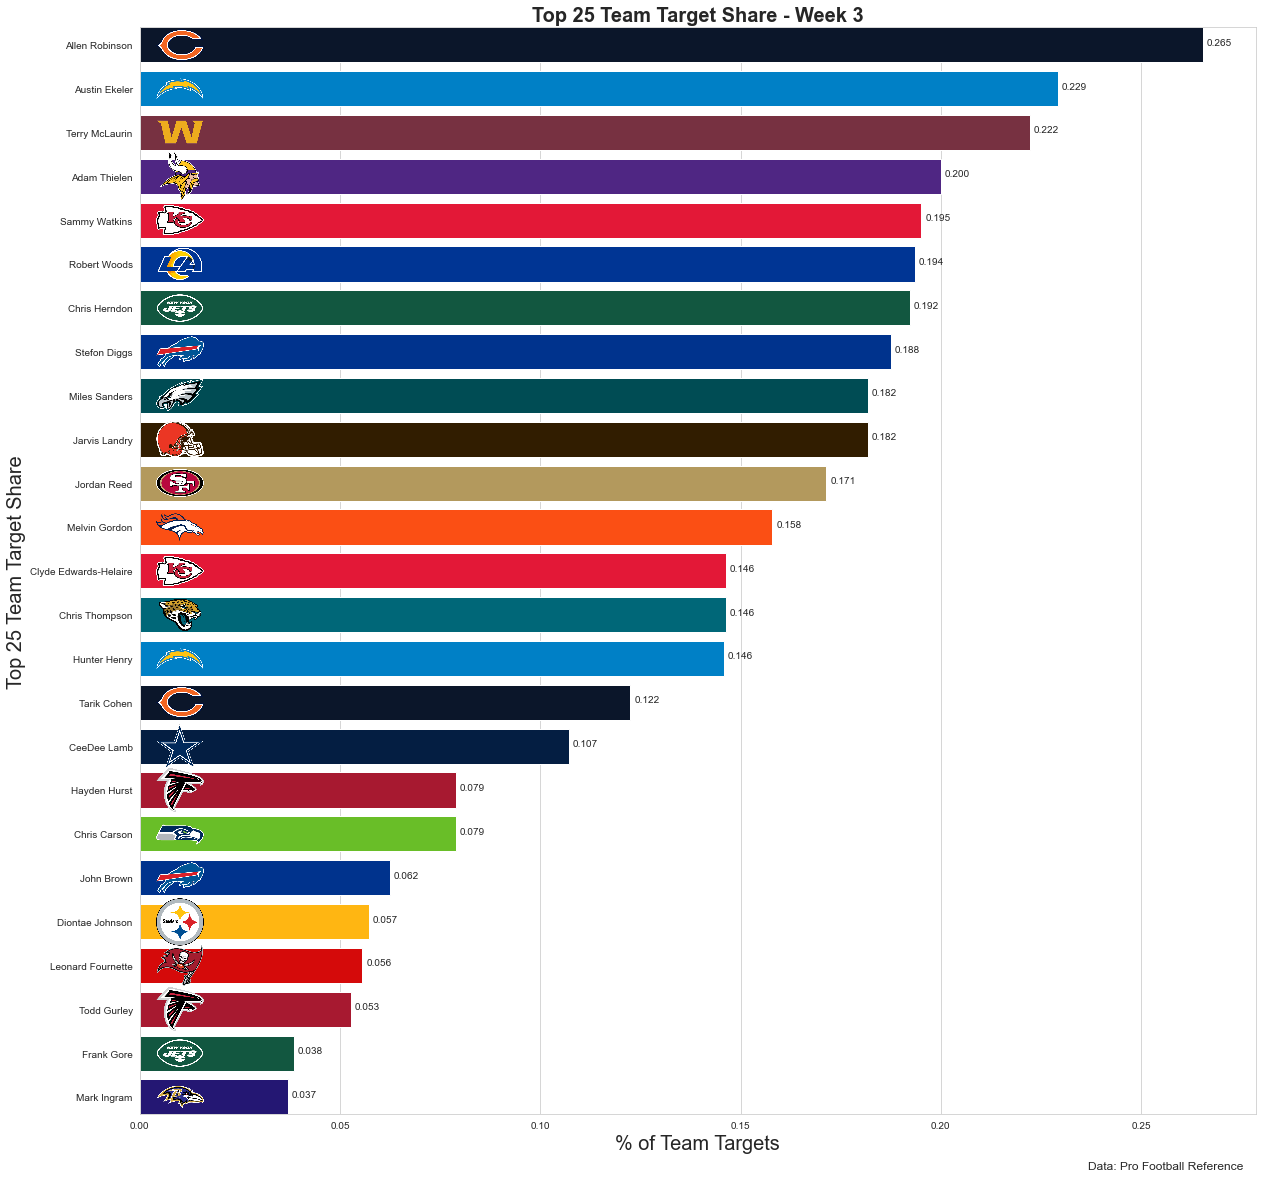

In [270]:
# my fantasy team
player_mask = df['player_name'].isin(player_list)
tgt_share_mask = df['tgt_share'] > 0
team_df = df.loc[player_mask & tgt_share_mask]

make_target_share_barh_viz(team_df)